In [54]:
import pandas as pd

In [55]:
data=pd.read_csv('tested.csv')

In [56]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [57]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [59]:
# a lot of missing values in the column of the cabin 
data.drop(columns=['Cabin'],inplace=True)

In [60]:
data['Age'].fillna(data['Age'].mean(),inplace=True)
data['Fare'].fillna(data['Fare'].mean(),inplace=True)

In [61]:
# The types for some columns are incorrect
data['Survived']=data['Survived'].astype('category')
data['Pclass']=data['Survived'].astype('category')
data['Sex']=data['Survived'].astype('category')
data['Age']=data['Survived'].astype('int')
data['Embarked']=data['Survived'].astype('category')



In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  418 non-null    int64   
 1   Survived     418 non-null    category
 2   Pclass       418 non-null    category
 3   Name         418 non-null    object  
 4   Sex          418 non-null    category
 5   Age          418 non-null    int32   
 6   SibSp        418 non-null    int64   
 7   Parch        418 non-null    int64   
 8   Ticket       418 non-null    object  
 9   Fare         418 non-null    float64 
 10  Embarked     418 non-null    category
dtypes: category(4), float64(1), int32(1), int64(3), object(2)
memory usage: 23.5+ KB


In [63]:
for new_data in [data]:
    new_data['title']=new_data['Name']
    new_data['title']=new_data['title'].str.extract(' ([A-Za-z]+)\.',expand=False)
    new_data['title']=new_data['title'].replace('Ms','Miss')
    new_data['title']=new_data['title'].replace('Mme','Mrs')
    new_data['title']=new_data['title'].replace('Mlle','Miss')
    new_data['title']=new_data['title'].fillna(0)
new_data['title'].value_counts() 

title
Mr        240
Miss       79
Mrs        72
Master     21
Col         2
Rev         2
Dr          1
Dona        1
Name: count, dtype: int64

In [64]:
new_data['title']=new_data['title'].replace(['Col','Rev','Dr','Dona'],'others')
numeric_title={'Mr':0,'Miss':1,'Mrs':2,'Master':3,'others':4}
new_data['title']=new_data['title'].map(numeric_title)
new_data['title'].value_counts() 

title
0    240
1     79
2     72
3     21
4      6
Name: count, dtype: int64

In [65]:
new_data.drop(columns=['Name'],inplace=True)

In [66]:
new_data.drop(columns=['PassengerId'],inplace=True)
new_data.drop(columns=['Ticket'],inplace=True)


C:\Users\PMLS\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\PMLS\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


<Axes: xlabel='Survived', ylabel='count'>

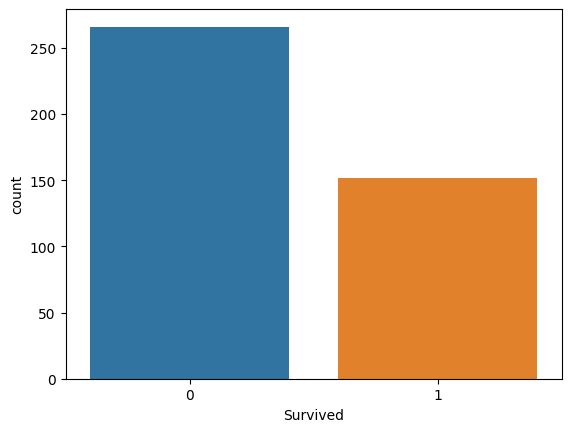

In [67]:
# import seaborn as sns
sns.countplot(x=new_data['Survived'])

In [68]:
new_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,title
0,0,0,0,0,0,0,7.8292,0,0
1,1,1,1,1,1,0,7.0000,1,2
2,0,0,0,0,0,0,9.6875,0,0
3,0,0,0,0,0,0,8.6625,0,0
4,1,1,1,1,1,1,12.2875,1,2


# Model Building

In [69]:
X=new_data.drop(columns=['Survived'],axis=1)
y=new_data['Survived']
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,title
0,0,0,0,0,0,7.8292,0,0
1,1,1,1,1,0,7.0000,1,2
2,0,0,0,0,0,9.6875,0,0
3,0,0,0,0,0,8.6625,0,0
4,1,1,1,1,1,12.2875,1,2
...,...,...,...,...,...,...,...,...
413,0,0,0,0,0,8.0500,0,0
414,1,1,1,0,0,108.9000,1,4
415,0,0,0,0,0,7.2500,0,0
416,0,0,0,0,0,8.0500,0,0


In [70]:
from sklearn.model_selection import train_test_split

In [79]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=10)

In [80]:
from sklearn import tree

In [81]:
clf=tree.DecisionTreeClassifier()

In [82]:
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [83]:
prediction=clf.predict(x_test)

In [84]:
from sklearn.metrics import accuracy_score

In [85]:
result=accuracy_score(y_test,prediction)
print(result*100)

100.0


In [86]:
clf.predict([[0,0,0,1,1,13.7750,0,3]])

C:\Users\PMLS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)